# Linear Regression

In [1]:
import os
os.chdir('C:\\Users\\teres\\Desktop\\Ano2_Bioinf_UM\\sistemas_inteligentes\\novo\\si\\src')

In [2]:
from si.data import Dataset
from si.util.util import summary
from si.util.scale import StandardScaler
from si.supervised import linreg, logreg
import numpy as np


In [3]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/lr-example1.data')
dataset = Dataset.from_data(filename, labeled=True)
StandardScaler().fit_transform(dataset,inline=True)
summary(dataset)

,A,Y
mean,2.987301e-16,5.839135
var,1.000000e+00,30.049970
max,3.647694e+00,24.147000
min,-8.137648e-01,-2.680700


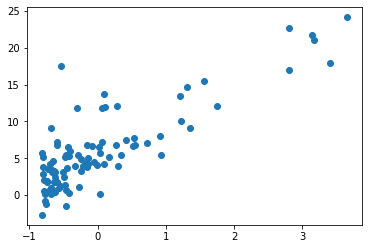

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
if dataset.X.shape[1]==1:
    plt.scatter(dataset.X, dataset.Y)
    plt.show()


## Linear Regression using closed form 

In [5]:
lr = linreg.LinearRegression()
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


In [6]:
idx = 10
x = dataset.X[idx]
print("x = ",x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ",y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.9172763535616557
y_true =  3.2522


In [7]:
#mean squared error of the samples
lr.cost()

4.476971375975178

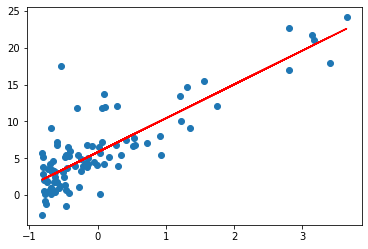

In [8]:
if dataset.X.shape[1] == 1:
    plt.scatter(dataset.X, dataset.Y)
    plt.plot(lr.X[:,1], np.dot(lr.X, lr.theta), '-', color='red')
    plt.show()


## Linear Regression using gradient descent

Function optimization

In [9]:
lr = linreg.LinearRegression(gd=True,epochs=50000)
lr.fit(dataset)
print('Theta = ', lr.theta)

Theta =  [5.83913505 4.59304113]


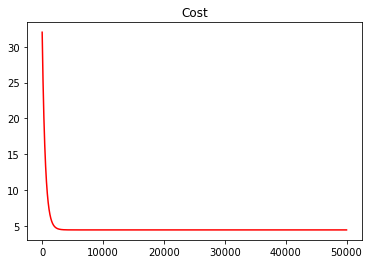

In [10]:
plt.plot(list(lr.history.keys()), [ y[1] for y in lr.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

# Linear Regression with Regularization

In [11]:
lr = linreg.LinearRegressionReg()
lr.fit(dataset)
print('Theta = ', lr.theta)


Theta =  [5.83913505 4.54617337]


In [12]:
idx = 10
x = dataset.X[idx]
print("x = ", x)
y = dataset.Y[idx]
y_pred = lr.predict(x)
print("y_pred = ", y_pred)
print("y_true = ", y)


x =  [-0.63614904]
y_pred =  2.94709123823497
y_true =  3.2522


# Logistic Regression

In [13]:
from si.supervised import logreg 
import pandas as pd

In [14]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")
y = [int(x != 'Iris-setosa') for x in iris.Y]
dataset = Dataset(iris.X[:,:2],np.array(y))
summary(dataset)

,A,B,Y
mean,5.843333,3.054000,0.666667
var,0.681122,0.186751,0.222222
max,7.900000,4.400000,1.000000
min,4.300000,2.000000,0.000000


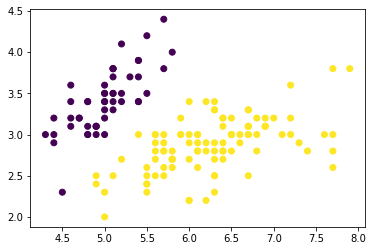

In [15]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
plt.show()

In [16]:
log_reg = logreg.LogisticRegression(epochs=20000)

In [17]:
log_reg.fit(dataset)
log_reg.theta

array([-0.30425044,  1.41730047, -2.25671188])

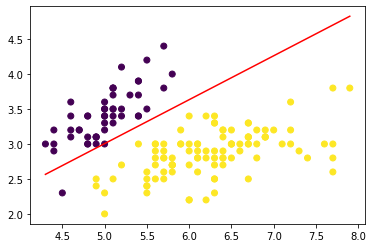

In [18]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-log_reg.theta[0]-log_reg.theta[1]*x)/log_reg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

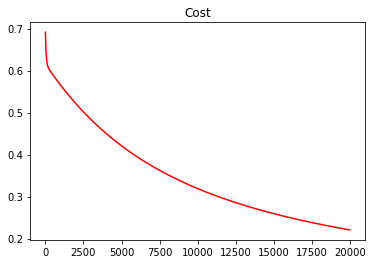

In [19]:
plt.plot(list(log_reg.history.keys()), [ y[1] for y in log_reg.history.values()], '-', color='red')
plt.title('Cost')
plt.show()

In [20]:
ex = np.array([5.5, 2])
print("Pred. example:", log_reg.predict(ex))


Pred. example: 1


# Logistic Regression with L2 regularization

In [21]:
logreg = logreg.LogisticRegressionReg()
logreg.fit(dataset)
logreg.theta

array([-0.88465655,  2.34501229, -3.72252587])

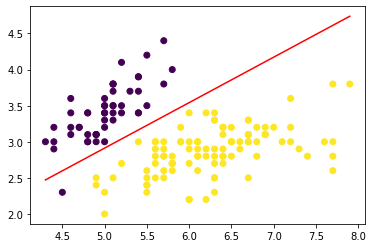

In [22]:
plt.scatter(dataset.X[:,0], dataset.X[:,1],c=dataset.Y)
_x = np.linspace(min(dataset.X[:,0]),max(dataset.X[:,0]),2)
_y = [(-logreg.theta[0]-logreg.theta[1]*x)/logreg.theta[2] for x in _x]
plt.plot(_x, _y, '-', color='red')
plt.show()

In [23]:
ex = np.array([5.5, 2])
print("Pred. example:", logreg.predict(ex))


Pred. example: 1


# Cross-validation

Iterações em diferentes conjuntos de treino e teste para treinar o modelo.

In [24]:
from si.util.cv import CrossValidationScore
from si.supervised import logreg

In [25]:
logreg_1 = logreg.LogisticRegression(epochs=1000)
cv = CrossValidationScore(logreg_1,dataset,cv=5)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.566271,0.550653
1,0.573311,0.523273
2,0.560710,0.587127
3,0.565560,0.567179
4,0.559751,0.585686


In [26]:
logreg_reg = logreg.LogisticRegressionReg(epochs=500, lbd=0.5)
cv = CrossValidationScore(logreg_reg, dataset, cv=4)
cv.run()
cv.toDataframe()

,Train Scores,Test Scores
0,0.173980,0.270286
1,0.155120,0.360445
2,0.179330,0.253343
3,0.176158,0.264728


# Grid Search with Cross-Validation

In [28]:
from si.util.cv import GridSearchCV

In [30]:
parameters ={'epochs':[100,200,400,800,1000],'lbd':[0,0.2,0.4,0.6]}
gs = GridSearchCV(logreg_reg, dataset, parameters, cv=3, split=0.8)
gs.run()
df = gs.toDataframe()

In [32]:
df.sort_values(by=['Train1','Test1'])

,epochs,lbd,Train1,Test1,Train2,Test2,Train3,Test3
16,1000,0.0,0.068170,0.151924,0.082487,0.107584,0.091829,0.063771
12,800,0.0,0.082133,0.145547,0.101198,0.074001,0.101187,0.080944
13,800,0.2,0.105230,0.288303,0.131127,0.159583,0.133107,0.152407
17,1000,0.2,0.116312,0.199722,0.125631,0.158795,0.124881,0.161443
14,800,0.4,0.148461,0.263465,0.145243,0.277625,0.145573,0.283949
8,400,0.0,0.149567,0.129272,0.141385,0.160536,0.125850,0.213727
18,1000,0.4,0.150048,0.246709,0.147076,0.257840,0.141798,0.279019
9,400,0.2,0.161846,0.216886,0.160496,0.231009,0.162690,0.205350
19,1000,0.6,0.170478,0.317212,0.179162,0.284711,0.174088,0.297577
15,800,0.6,0.175565,0.295014,0.172806,0.307530,0.170347,0.315497
